**import pandas and "store.xlsx" excel file.**
`data.dtypes` showing all datatypes of file columns according value

In [1]:
import pandas as pd
data  = pd.read_excel('store.xlsx')
data.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Country                         object
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

`data.head(5)` for showing top 5 rows

In [2]:
data.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


**Counting How many values not exist in each column**
`axis=0` == column and `axis=1`== row

In [3]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

**Counting How many values not exist in each row**

In [4]:
data.apply(lambda x: sum(x.isnull()), axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1922    0
1923    0
1924    0
1925    0
1926    0
1927    0
1928    0
1929    0
1930    0
1931    0
1932    0
1933    0
1934    0
1935    1
1936    0
1937    0
1938    0
1939    0
1940    0
1941    0
1942    0
1943    1
1944    0
1945    0
1946    0
1947    0
1948    0
1949    0
1950    0
1951    0
Length: 1952, dtype: int64

**Filtering data using some condition**
`"Region" == "West" and "Order Priority" == "High" and "Discount" >= 0.1`

In [5]:
data.loc[(data['Region'] == 'West') & (data['Order Priority']=='High') & (data['Discount'] >= 0.1),['Customer Name','State or Province', 'City', 'Discount']]

,Customer Name,State or Province,City,Discount
401,Jenny Gold,California,Los Angeles,0.1
409,Kelly O'Connor,California,Santa Rosa,0.1
519,Tracy Livingston,California,Redding,0.1
922,Elsie Pridgen,California,Laguna Hills,0.1
965,Kerry Wilkerson,Idaho,Moscow,0.1
1490,Lillian Fischer,California,Menlo Park,0.1
1951,Tammy Buckley,Wyoming,Cheyenne,0.1


**Showing Pivot table based on "Region", "Order Priority" columns **

In [27]:
import numpy as np
pd.pivot_table(data,index=["Region",'Order Priority'], values=["Profit", 'Discount'], aggfunc=[np.sum])

sum              
                       Discount        Profit
Region  Order Priority                       
Central Critical           5.89   2831.796570
        High               5.99  12285.602152
        Low                5.73  20725.011450
        Medium             4.82  21499.016550
        Not Specified      5.23  20024.045947
East    Critical           5.09  11991.339090
        High               4.59  11570.762210
        Low                4.20  11871.653440
        Medium             5.13  18708.837285
        Not Specified      4.54  31148.811421
South   Critical           4.35   8608.255240
        High               5.05  -2008.785850
        Low                4.67  -3367.159383
        Medium             3.73 -13285.232206
        Not Specified      4.22  -4371.132180
West    Critical           3.42  14893.446424
        Critical           0.06    -19.099200
        High               4.37  14652.952800
        Low                5.79   6185.347428
        Medium             4.55  16447.500132
        Not Specified      4.18  23684.642518

**Pie graph of "Customers in Region" **

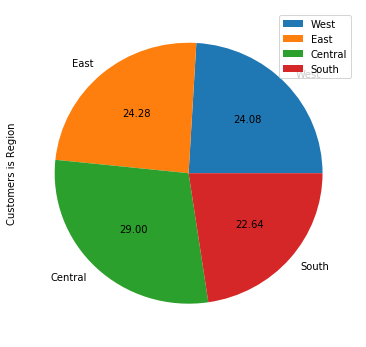

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
a = data.Region.value_counts()
series = pd.Series(a, index=data.Region.unique(), name='Customers is Region')
series.plot.pie(figsize=(6, 6), autopct='%.2f',legend=True)


**Order timeline** 
Showing number of orders in day

Text(0,0.5,u'Number of Order')

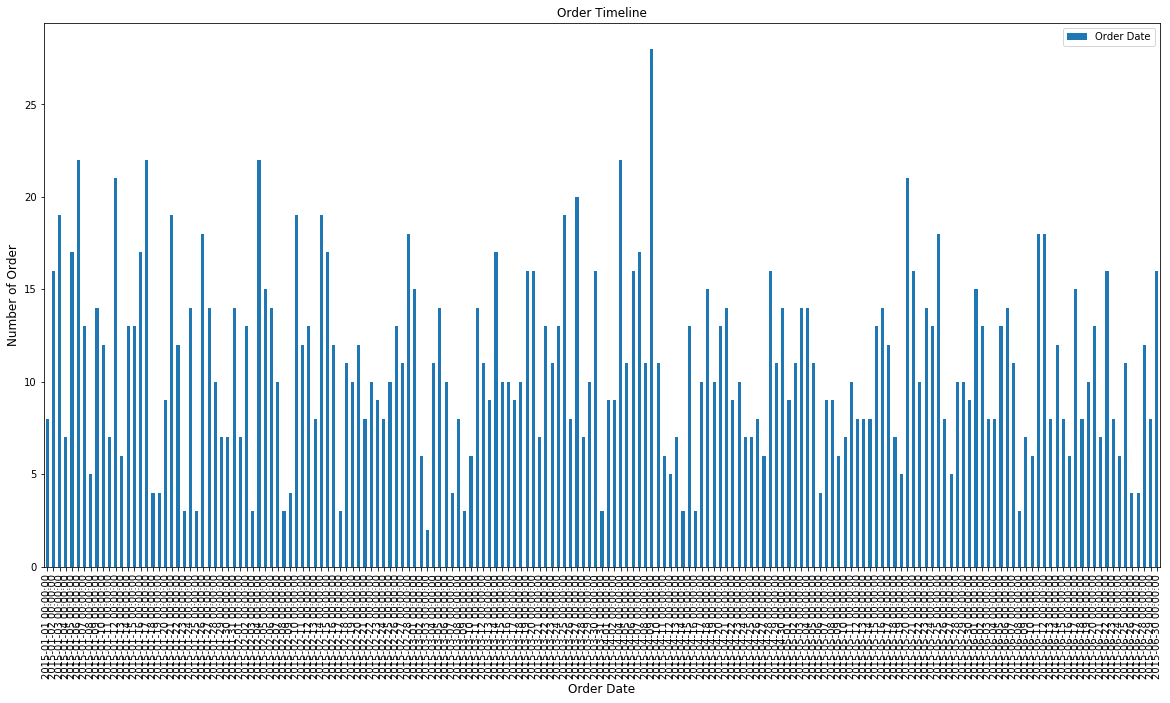

In [102]:
content = data['Order Date'].value_counts().sort_index()
ax = content.plot(kind='bar', title ="Order Timeline", figsize=(20, 10), legend=True, fontsize=10)
ax.set_xlabel("Order Date", fontsize=12)
ax.set_ylabel("Number of Order", fontsize=12)
plt.show()